## Final Project
Xiaotong Cui

xiaotongcui@uchicago.edu

Goal of this notebook:
Use pure text and (LR, RF, NN) to classify whether have religion or not.
Turn text to D2V.
Lets go!

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks')

Mounted at /content/drive


In [2]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
!pip install -U git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git
import lucem_illud

#All these packages need to be installed from pip
#For ML
import sklearn
# import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

from functools import reduce
from itertools import permutations
import math

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

  Cloning https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to /tmp/pip-req-build-8r7mykbe
  Running command git clone --filter=blob:none --quiet https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git /tmp/pip-req-build-8r7mykbe
  Resolved https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to commit b17a265d3b8253424e5b38872457f7437909a65d
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.8/76.8 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━

In [ ]:
import pandas as pd

df = pd.read_csv('../data/dateappdata/cleaned_okc.csv')
df.head()

<ipython-input-59-cb35d94884fd>:3: DtypeWarning: Columns (0,10,11,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,28

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,Unnamed: 693,Unnamed: 694,Unnamed: 695,Unnamed: 696,Unnamed: 697,Unnamed: 698,Unnamed: 699,Unnamed: 700,Unnamed: 701,Unnamed: 702
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29,single,m,straight,average,mostly anything,socially,NaN,graduated from college/university,white,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31,single,f,straight,average,mostly anything,socially,never,graduated from college/university,white,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24,single,f,straight,NaN,strictly anything,socially,NaN,graduated from college/university,white,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.loc[:, ~df.columns.str.startswith('Unnamed')]

# 现在的 df 中已经删除了以 'Unnamed' 开头的列

# 如果你想要确认删除操作是否正确，你可以打印 df 的列
print(df.columns)

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'location', 'offspring', 'pets', 'sign', 'smokes', 'speaks', 'About Me',
       'Occupation Intro', 'Good At', 'Physical Appearance', 'Hobby',
       'Important Things', 'Reflection', 'Social Style', 'Secret',
       'Ideal Type', 'Merged_Column', 'seriousness_degree', 'belief',
       'religion_clean'],
      dtype='object')


In [ ]:
df = df[df['religion_clean'] != 'other']
def get_belief_num(religion):
    if religion in ['agnosticism', 'atheism']:
        return 0
    elif religion == 'theism':
        return 1
    else:
        return None

# 应用函数创建新列 'belief_num'
df['belief_num'] = df['religion_clean'].apply(get_belief_num)

<ipython-input-61-1bac0bc0d935>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['belief_num'] = df['religion_clean'].apply(get_belief_num)


In [ ]:
df.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,Important Things,Reflection,Social Style,Secret,Ideal Type,Merged_Column,seriousness_degree,belief,religion_clean,belief_num
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...,about me: i would love to think that i was so...,agnosticism,4,agnosticism,0.0
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN,i am a chef: this is what that means. 1. i am ...,agnosticism,2,agnosticism,0.0
2,29,single,m,straight,average,mostly anything,socially,NaN,graduated from college/university,white,...,"like everyone else, i love my friends and fami...",what my contribution to the world is going to ...,out with my friends!,i cried on my first day at school because a bi...,you're awesome.,"i'm an australian living in san francisco, but...",atheism,0,atheism,0.0
3,31,single,f,straight,average,mostly anything,socially,never,graduated from college/university,white,...,"friends, family, notebook/pen, books, music, t...",things that amuse and inspire me,out and about or relaxing at home with a good ...,NaN,NaN,"writing. meeting new people, spending time wi...",christianity,0,theism,1.0
4,24,single,f,straight,NaN,strictly anything,socially,NaN,graduated from college/university,white,...,sports/my softball glove coffee. because nobod...,NaN,"in or out... drinking with friends, maybe a ba...",potential friends/lovers/people who come in co...,http://www.youtube.com/watch?v=4dxbwzuwsxk let...,"oh goodness. at the moment i have 4 jobs, so ...",christianity,2,theism,1.0


In [ ]:
def clean_text(text):
    if isinstance(text, float):
        text = str(text) # convert float to string
    text = text.replace('\n', ' ') # remove newline
    text = text.replace('\r', ' ') # remove carriage return
    text = text.replace('\t', ' ') # remove tab
    text = text.replace('  ', ' ') # remove double spaces
    text = text.replace('\#', ' ') # remove \#, which we used as a separator
    text = text.replace('  ', ' ') # remove double spaces
    return text

# Now we will apply the function to the "Ideal Type" column
df['Merged_Column'] = df['Merged_Column'].apply(clean_text)
# df_new['Merged_Column'] = df_new['Merged_Column'].apply(clean_text)

In [ ]:
Merged_Column = df['Merged_Column'].tolist()
# Here we need to get tokenuized words and normalized tokens
# Same as hw2 lets do it!
import spacy
nlp = spacy.load("en_core_web_sm")
ideal_type = df['Merged_Column'].tolist()
def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized
Merged_Column_tokenized = [word_tokenize(ideal_type) for ideal_type in ideal_type]
df['Merged_Column_Tokenized'] = Merged_Column_tokenized

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
def normalizeTokens(word_list, extra_stop=['ve']):
    #We can use a generator here as we just need to iterate over it
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list])

    doc = nlp(word_list.lower())

    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))

    return normalized

df['normalized_merged_tokens'] = df['Merged_Column_Tokenized'].apply(lambda x: normalizeTokens(x))

In [ ]:
# Now we want the merged text be a doc2vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(words=doc, tags=[str(i)]) for i, doc in enumerate(df['normalized_merged_tokens'])]

vector_size = 100
model = Doc2Vec(vector_size=vector_size, window=5, min_count=10, workers=4, epochs=5)
model.build_vocab(documents)
model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)


df['doc2vec_merged_vector'] = df['normalized_merged_tokens'].apply(lambda x: model.infer_vector(x))

In [ ]:
# 将 'doc2vec_merged_vector' 列的数组连接成一个单一数组
flattened_data = np.concatenate(df['doc2vec_merged_vector'].values)

# 将数组转换为 NumPy 数组，并确保数据类型是浮点数
numeric_data = np.array(flattened_data, dtype=np.float32)

# 确保 numeric_data 的形状正确
numeric_data = numeric_data.reshape(-1, len(df['doc2vec_merged_vector'].values[0]))

# 将 numeric_data 存储在新列 'numeric_doc2vec_merged_vector' 中
df['numeric_doc2vec_merged_vector'] = numeric_data.tolist()

In [ ]:
# 删除 'belief_num' 列中为 NaN 的行
df = df.dropna(subset=['belief_num'])

In [ ]:
df.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,Ideal Type,Merged_Column,seriousness_degree,belief,religion_clean,belief_num,Merged_Column_Tokenized,normalized_merged_tokens,doc2vec_merged_vector,numeric_doc2vec_merged_vector
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,you want to be swept off your feet! you are ti...,about me: i would love to think that i was som...,agnosticism,4,agnosticism,0.0,"[about, me, i, would, love, to, think, that, i...","[love, think, kind, intellectual, dumb, smart,...","[0.04251012, 0.117463045, -0.079076536, -0.072...","[0.04251011833548546, 0.11746304482221603, -0...."
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,NaN,i am a chef: this is what that means. 1. i am ...,agnosticism,2,agnosticism,0.0,"[i, am, a, chef, this, is, what, that, means, ...","[chef, mean, workaholic, love, cook, regardles...","[0.0015362031, 0.07848861, -0.029258776, 0.268...","[0.0015362030826508999, 0.07848861068487167, -..."
2,29,single,m,straight,average,mostly anything,socially,NaN,graduated from college/university,white,...,you're awesome.,"i'm an australian living in san francisco, but...",atheism,0,atheism,0.0,"[i, 'm, an, australian, living, in, san, franc...","[m, australian, living, san, francisco, hold, ...","[0.13085885, 0.24214867, -0.047117453, -0.0638...","[0.13085885345935822, 0.24214866757392883, -0...."
3,31,single,f,straight,average,mostly anything,socially,never,graduated from college/university,white,...,NaN,"writing. meeting new people, spending time wi...",christianity,0,theism,1.0,"[writing, meeting, new, people, spending, time...","[writing, meet, new, people, spend, time, frie...","[0.020695468, -0.057920806, 0.013652466, -0.05...","[0.02069546841084957, -0.05792080610990524, 0...."
4,24,single,f,straight,NaN,strictly anything,socially,NaN,graduated from college/university,white,...,http://www.youtube.com/watch?v=4dxbwzuwsxk let...,"oh goodness. at the moment i have 4 jobs, so ...",christianity,2,theism,1.0,"[oh, goodness, at, the, moment, i, have, 4, jo...","[oh, goodness, moment, job, nice, find, settle...","[-0.01413233, -0.021902967, 0.21798447, 0.1001...","[-0.014132330194115639, -0.021902967244386673,..."


### Logistic Regressioin

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# 假设你的特征是 'normalized_merged_tokens'，目标是 'mapped_religion'
X = df['numeric_doc2vec_merged_vector'].tolist()
y = df['belief_num']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化 Logistic Regression 模型
model_lr = LogisticRegression()

# 训练模型
model_lr.fit(X_train, y_train)

# 预测训练集和测试集
y_pred_train = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)

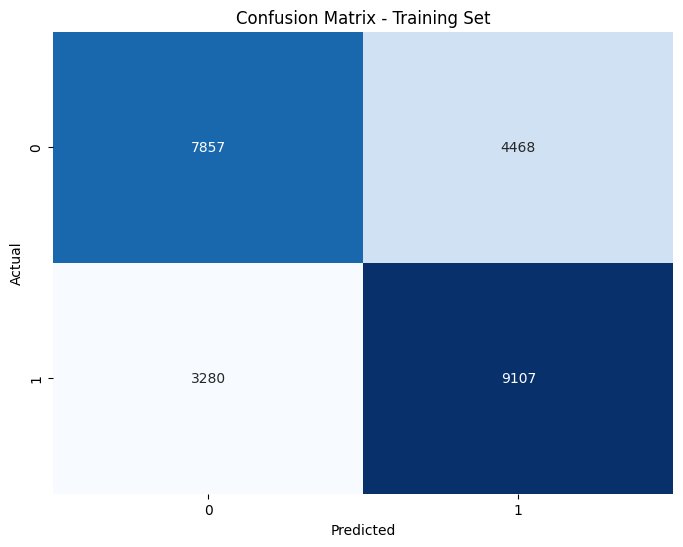

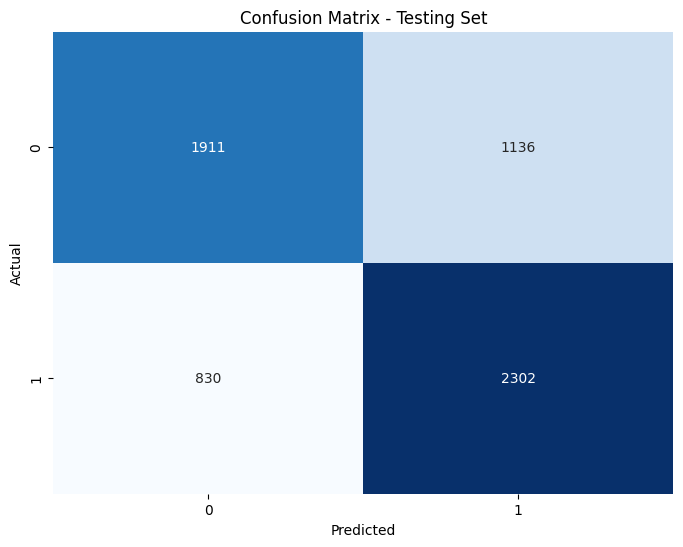

Training Set Metrics:
Precision: 0.6881
Recall: 0.6865
F1 Score: 0.6857

Testing Set Metrics:
Precision: 0.6832
Recall: 0.6818
F1 Score: 0.6808


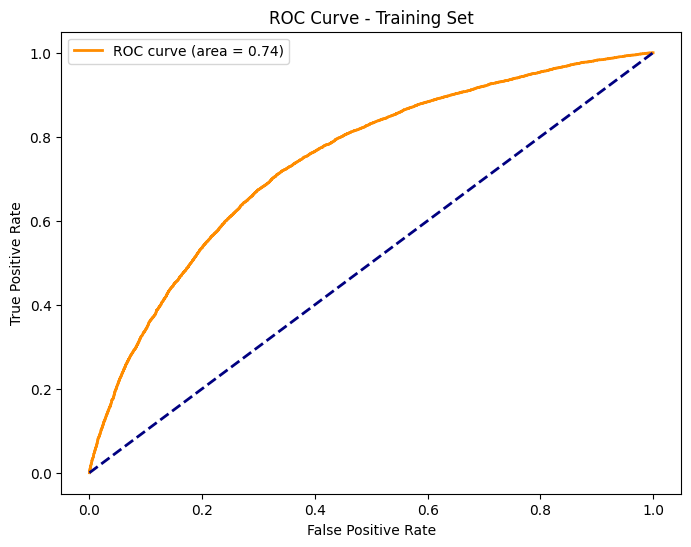

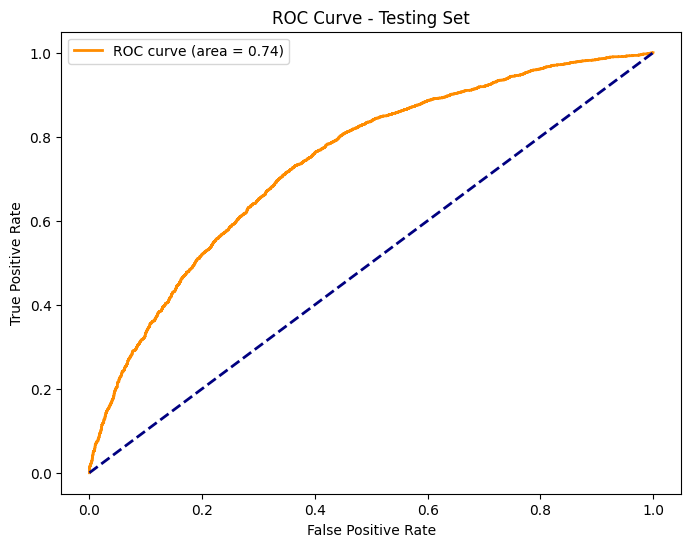

In [6]:
# 混淆矩阵可视化函数
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# 训练集混淆矩阵可视化
plot_confusion_matrix(y_train, y_pred_train, title='Confusion Matrix - Training Set')

# 测试集混淆矩阵可视化
plot_confusion_matrix(y_test, y_pred_test, title='Confusion Matrix - Testing Set')

# 计算精度、召回率、F1 分数
precision_train = precision_score(y_train, y_pred_train, average='weighted')
recall_train = recall_score(y_train, y_pred_train, average='weighted')
f1_train = f1_score(y_train, y_pred_train, average='weighted')

precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

print("Training Set Metrics:")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1 Score: {f1_train:.4f}")

print("\nTesting Set Metrics:")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")

# Calculate AUC & ROC
def plot_roc_curve(y_true, y_prob, title='ROC Curve'):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob, pos_label=1)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.show()

# Visualize ROC Train
y_prob_train = model_lr.predict_proba(X_train)[:, 1]
plot_roc_curve(y_train, y_prob_train, title='ROC Curve - Training Set')

# Visualize ROC Test
y_prob_test = model_lr.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_prob_test, title='ROC Curve - Testing Set')

Logistic Regreesion Classification Report (Training Set):
              precision    recall  f1-score   support

         0.0       0.71      0.64      0.67     12325
         1.0       0.67      0.74      0.70     12387

    accuracy                           0.69     24712
   macro avg       0.69      0.69      0.69     24712
weighted avg       0.69      0.69      0.69     24712

Logistic Regreesion Classification Report (Testing Set):
              precision    recall  f1-score   support

         0.0       0.70      0.63      0.66      3047
         1.0       0.67      0.73      0.70      3132

    accuracy                           0.68      6179
   macro avg       0.68      0.68      0.68      6179
weighted avg       0.68      0.68      0.68      6179



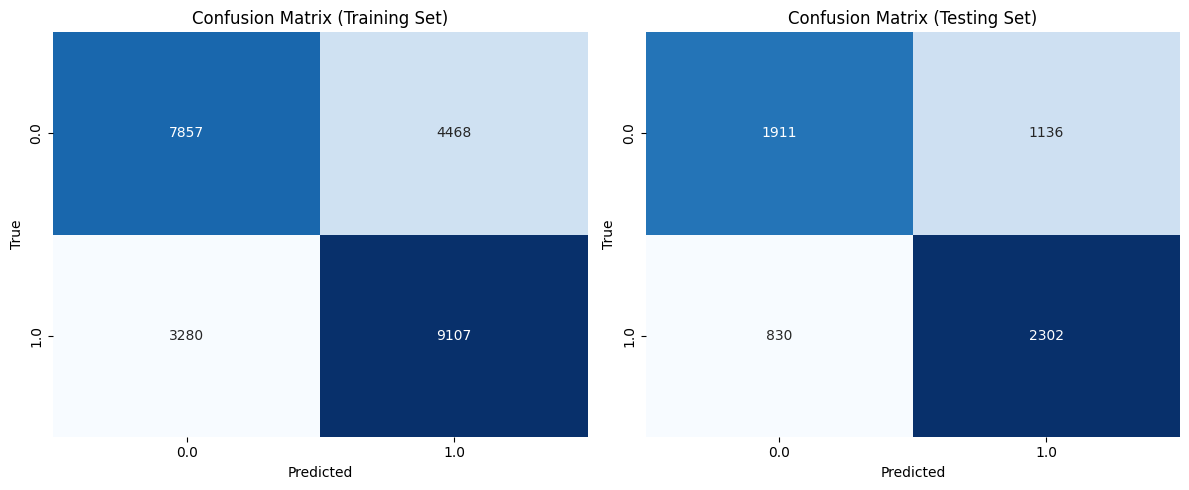

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_train_dt = model_lr.predict(X_train)
y_pred_test_dt = model_lr.predict(X_test)

# 评估性能
print("Logistic Regreesion Classification Report (Training Set):")
print(classification_report(y_train, y_pred_train_dt))

print("Logistic Regreesion Classification Report (Testing Set):")
print(classification_report(y_test, y_pred_test_dt))

# 可视化混淆矩阵
cm_dt_train = confusion_matrix(y_train, y_pred_train_dt)
cm_dt_test = confusion_matrix(y_test, y_pred_test_dt)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_dt_train, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=model_lr.classes_, yticklabels=model_lr.classes_)
plt.title('Confusion Matrix (Training Set)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(cm_dt_test, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=model_lr.classes_, yticklabels=model_lr.classes_)
plt.title('Confusion Matrix (Testing Set)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

### Decision Tree & Random Forest

Decision Tree Classification Report (Training Set):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12325
         1.0       1.00      1.00      1.00     12387

    accuracy                           1.00     24712
   macro avg       1.00      1.00      1.00     24712
weighted avg       1.00      1.00      1.00     24712

Decision Tree Classification Report (Testing Set):
              precision    recall  f1-score   support

         0.0       0.57      0.58      0.57      3047
         1.0       0.58      0.58      0.58      3132

    accuracy                           0.58      6179
   macro avg       0.58      0.58      0.58      6179
weighted avg       0.58      0.58      0.58      6179



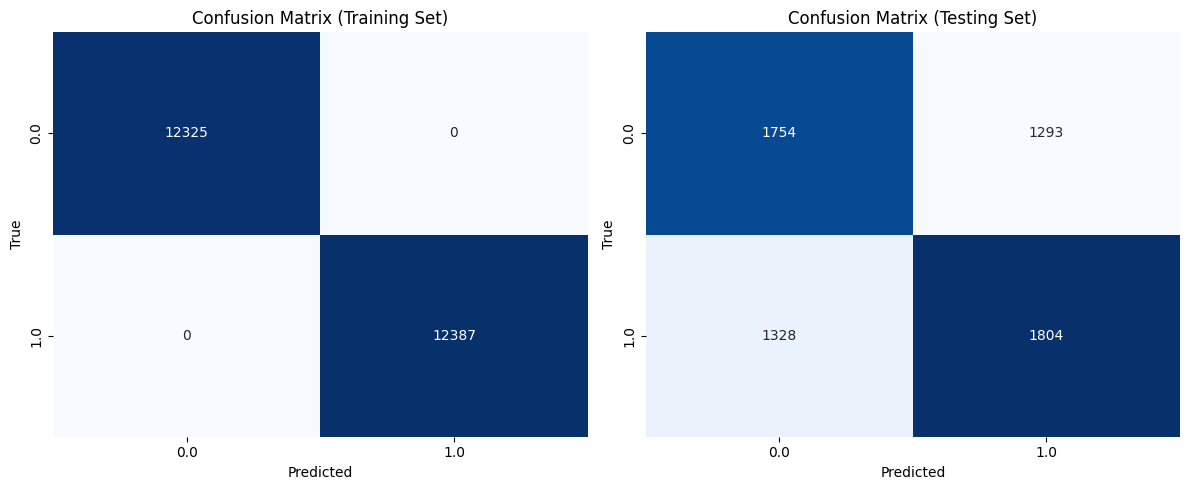

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# 生成目标标签，这里假设有1000个样本
X = df1['numeric_doc2vec_merged_vector'].tolist()
y = df1['belief_num']
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化决策树分类器
dt_classifier = DecisionTreeClassifier()

# 训练决策树模型
dt_classifier.fit(X_train, y_train)

# 预测训练集和测试集
y_pred_train_dt = dt_classifier.predict(X_train)
y_pred_test_dt = dt_classifier.predict(X_test)

# 评估性能
print("Decision Tree Classification Report (Training Set):")
print(classification_report(y_train, y_pred_train_dt))

print("Decision Tree Classification Report (Testing Set):")
print(classification_report(y_test, y_pred_test_dt))

# 可视化混淆矩阵
cm_dt_train = confusion_matrix(y_train, y_pred_train_dt)
cm_dt_test = confusion_matrix(y_test, y_pred_test_dt)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_dt_train, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=dt_classifier.classes_, yticklabels=dt_classifier.classes_)
plt.title('Confusion Matrix (Training Set)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(cm_dt_test, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=dt_classifier.classes_, yticklabels=dt_classifier.classes_)
plt.title('Confusion Matrix (Testing Set)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

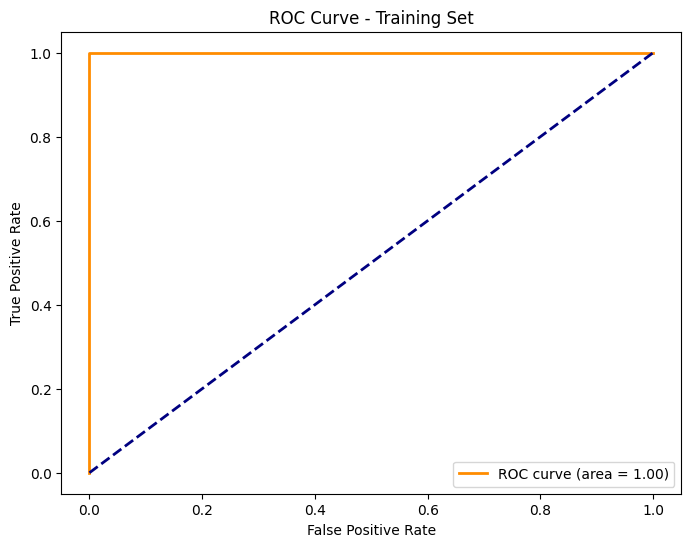

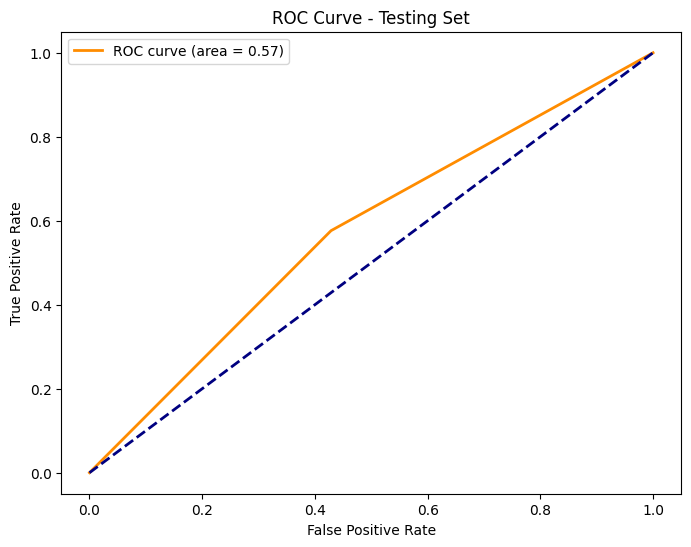

In [ ]:
# Calculate AUC & ROC
def plot_roc_curve(y_true, y_prob, title='ROC Curve'):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob, pos_label=1)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.show()

# Visualize ROC Train
y_prob_train = dt_classifier.predict_proba(X_train)[:, 1]
plot_roc_curve(y_train, y_prob_train, title='ROC Curve - Training Set')

# Visualize ROC Test
y_prob_test = dt_classifier.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_prob_test, title='ROC Curve - Testing Set')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 初始化随机森林分类器
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练随机森林模型
rf_classifier.fit(X_train, y_train)

# 预测训练集和测试集
y_pred_train_rf = rf_classifier.predict(X_train)
y_pred_test_rf = rf_classifier.predict(X_test)

# 评估性能
print("Random Forest Classification Report (Training Set):")
print(classification_report(y_train, y_pred_train_rf))

print("Random Forest Classification Report (Testing Set):")
print(classification_report(y_test, y_pred_test_rf))


Random Forest Classification Report (Training Set):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12325
         1.0       1.00      1.00      1.00     12387

    accuracy                           1.00     24712
   macro avg       1.00      1.00      1.00     24712
weighted avg       1.00      1.00      1.00     24712

Random Forest Classification Report (Testing Set):
              precision    recall  f1-score   support

         0.0       0.65      0.72      0.68      3047
         1.0       0.70      0.63      0.66      3132

    accuracy                           0.67      6179
   macro avg       0.68      0.67      0.67      6179
weighted avg       0.68      0.67      0.67      6179



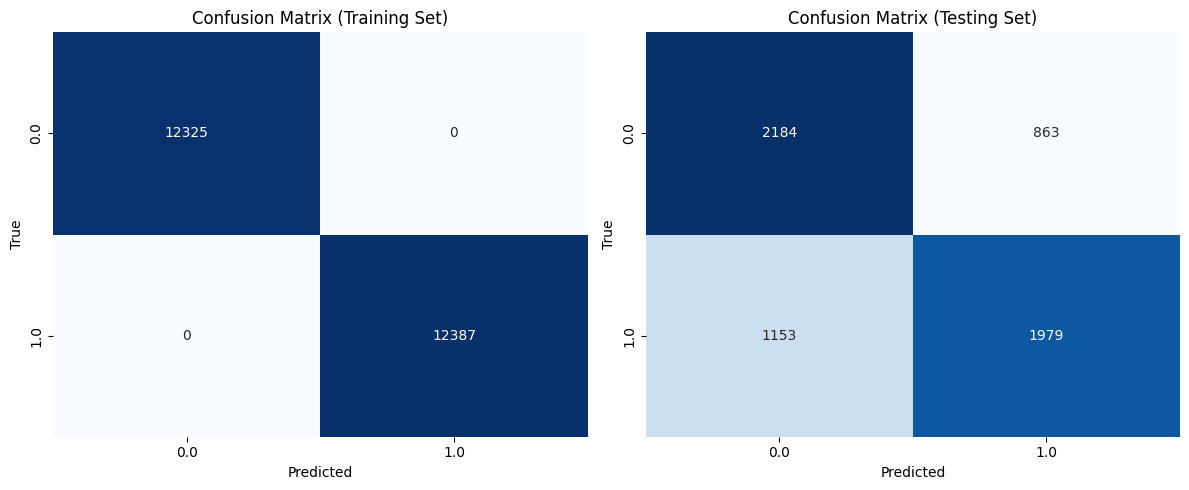

In [ ]:
# 可视化混淆矩阵
cm_dt_train = confusion_matrix(y_train, y_pred_train_rf)
cm_dt_test = confusion_matrix(y_test, y_pred_test_rf)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_dt_train, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=dt_classifier.classes_, yticklabels=dt_classifier.classes_)
plt.title('Confusion Matrix (Training Set)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(cm_dt_test, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=dt_classifier.classes_, yticklabels=dt_classifier.classes_)
plt.title('Confusion Matrix (Testing Set)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

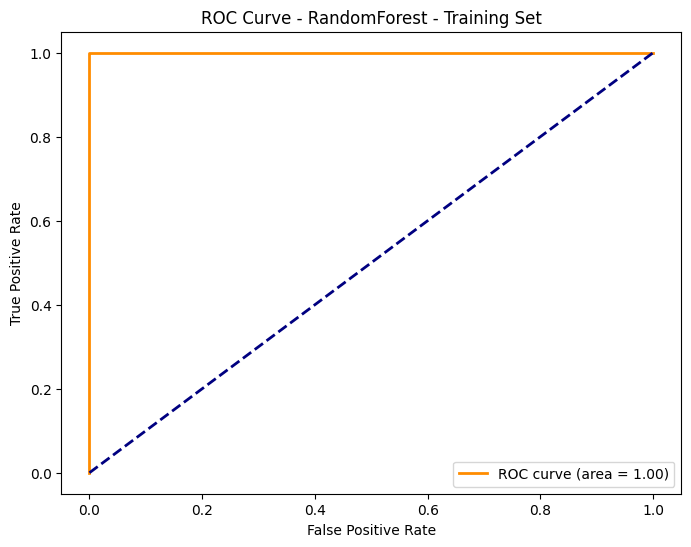

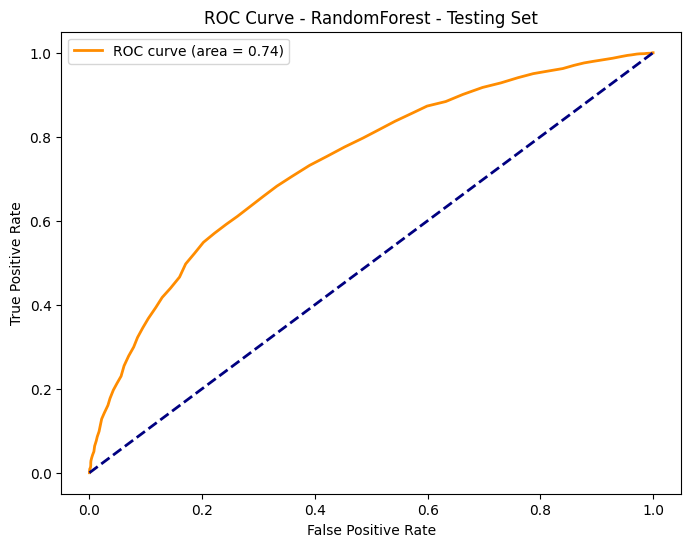

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(y_true, y_prob, title='ROC Curve'):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob, pos_label=1)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.show()

# 计算测试集上的概率
y_prob_train_rf = rf_classifier.predict_proba(X_train)[:, 1]
y_prob_test_rf = rf_classifier.predict_proba(X_test)[:, 1]

# Visualize ROC for RandomForestClassifier on Training Set
plot_roc_curve(y_train, y_prob_train_rf, title='ROC Curve - RandomForest - Training Set')

# Visualize ROC for RandomForestClassifier on Testing Set
plot_roc_curve(y_test, y_prob_test_rf, title='ROC Curve - RandomForest - Testing Set')


### Nueral Network

In [ ]:
df.to_csv('../data/dateappdata/finalized_data.csv', index=False)

In [3]:
import pandas as pd
df = pd.read_csv('../data/dateappdata/finalized_data.csv')

In [4]:
# 将字符串形式的向量转换为实际的列表形式
import ast
df['numeric_doc2vec_merged_vector'] = df['numeric_doc2vec_merged_vector'].apply(ast.literal_eval)

In [ ]:
pip install tensorflow

In [ ]:
X1 = df1['numeric_doc2vec_merged_vector'].tolist()
y1 = df1['belief_num']

In [11]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')  # Assuming you have 9 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)


# Evaluate on the test set
y_pred_nn_prob = model.predict(X_test_scaled)

# Get the predicted classes
y_pred_nn = np.argmax(y_pred_nn_prob, axis=1)

# Evaluate on the test set
y_pred_nn_probt = model.predict(X_train_scaled)

# Get the predicted classes
y_pred_nnt = np.argmax(y_pred_nn_probt, axis=1)

print("Neural Network Classification Report (Training Set):")
print(classification_report(y_train, y_pred_nnt))


# Print classification report
print("Neural Network Classification Report(Testing Set)::")
print(classification_report(y_test, y_pred_nn))

Epoch 1/10
618/618 [==============================] - 7s 5ms/step - loss: 0.6238 - accuracy: 0.6656 - val_loss: 0.6129 - val_accuracy: 0.6662
Epoch 2/10
618/618 [==============================] - 2s 4ms/step - loss: 0.5791 - accuracy: 0.7031 - val_loss: 0.6130 - val_accuracy: 0.6624
Epoch 3/10
618/618 [==============================] - 2s 3ms/step - loss: 0.5530 - accuracy: 0.7217 - val_loss: 0.6210 - val_accuracy: 0.6619
Epoch 4/10
618/618 [==============================] - 2s 3ms/step - loss: 0.5260 - accuracy: 0.7377 - val_loss: 0.6364 - val_accuracy: 0.6619
Epoch 5/10
618/618 [==============================] - 2s 3ms/step - loss: 0.4944 - accuracy: 0.7598 - val_loss: 0.6559 - val_accuracy: 0.6571
Epoch 6/10
618/618 [==============================] - 2s 3ms/step - loss: 0.4610 - accuracy: 0.7812 - val_loss: 0.6913 - val_accuracy: 0.6579
Epoch 7/10
618/618 [==============================] - 3s 5ms/step - loss: 0.4254 - accuracy: 0.8024 - val_loss: 0.7184 - val_accuracy: 0.6490
Epoch 

194/194 [==============================] - 0s 2ms/step


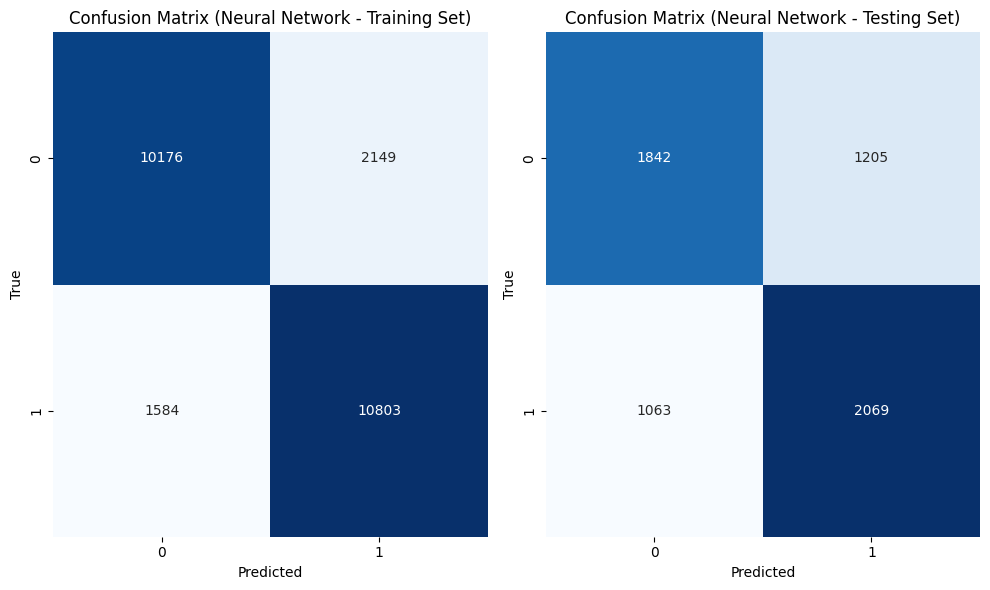

In [ ]:
# Evaluate on the training set
y_pred_prob_nn_train = model.predict(X_train_scaled)

# Get the predicted class labels for training set
y_pred_nn_train = np.argmax(y_pred_prob_nn_train, axis=1)

# Evaluate on the test set
y_pred_prob_nn_test = model.predict(X_test_scaled)

# Get the predicted class labels for training set
y_pred_nn_test = np.argmax(y_pred_prob_nn_test, axis=1)

# Plot confusion matrix for training set
cm_nn_train = confusion_matrix(y_train, y_pred_nn_train)

# Plot confusion matrix for testing set
cm_nn = confusion_matrix(y_test, y_pred_nn_test)

# Plot confusion matrix for training set
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.heatmap(cm_nn_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Neural Network - Training Set)')
plt.xlabel('Predicted')
plt.ylabel('True')

# Plot confusion matrix for testing set
plt.subplot(1, 2, 2)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Neural Network - Testing Set)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

773/773 [==============================] - 2s 2ms/step


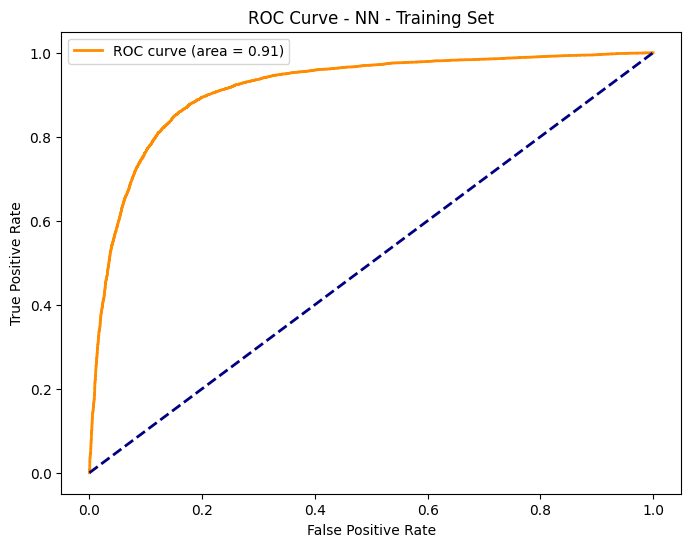

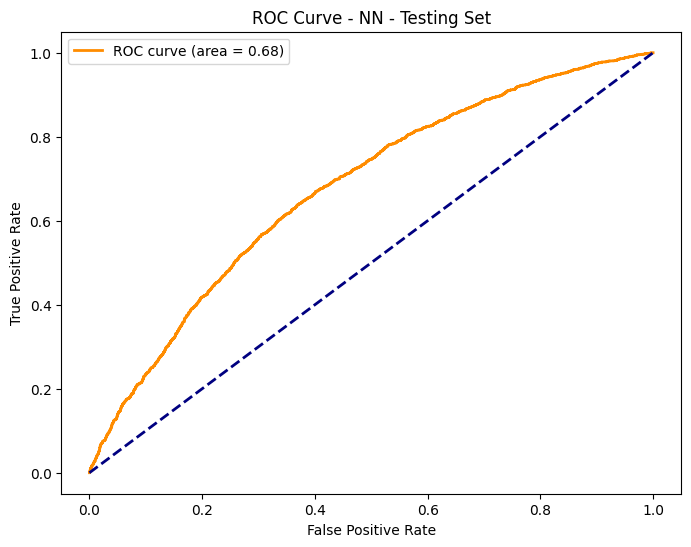

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Convert labels to binary format
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_train_bin = lb.fit_transform(y_train)

# Predict probabilities using the model
y_prob_nn = model.predict(X_test_scaled)
y_prob_nn_train = model.predict(X_train_scaled)

# Visualize ROC for RandomForestClassifier on Training Set
plot_roc_curve(y_train, y_prob_nn_train[:, 1], title='ROC Curve - NN - Training Set')

# Visualize ROC for RandomForestClassifier on Testing Set
plot_roc_curve(y_test, y_prob_nn[:, 1], title='ROC Curve - NN - Testing Set')


In [ ]:
df['About Me']

0        about me:  i would love to think that i was so...
1        i am a chef: this is what that means. 1. i am ...
2        i'm an australian living in san francisco, but...
3                                                      NaN
4                                                      NaN
                               ...                        
38382    vibrant, expressive, caring optimist. i love b...
38383    i'm nick. i never know what to write about mys...
38384    hello! i enjoy traveling, watching movies, and...
38385    "all i have in this world are my balls and my ...
38386    is it odd that having a little "enemy" status ...
Name: About Me, Length: 30896, dtype: object